# Lab 5 

In [55]:
# Import modules
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import modules for machine learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [56]:
# Henter dataset:
df = pd.read_csv(r'C:\Users\solve\Downloads\student_performance.csv', sep=',')
df.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

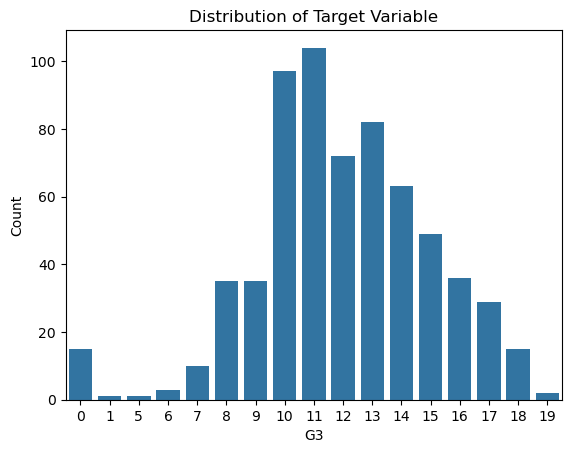

In [58]:
#Visualize the distrubution of the target variable (G3)

sns.countplot(x='G3', data=df)
plt.title('Distribution of Target Variable')
plt.xlabel('G3')
plt.ylabel('Count')
plt.show()

## Task 2: Prepare the target varaible

In [59]:
# Endrer navn på Kolonnene G1, G2 og G3:
df.rename(columns={'G1': 'period_1_grades', 'G2': 'period_2_grades', 'G3': 'final_grade'}, inplace=True)

# Oppretter binary kolonne for Bestått/ikke bestått:
df['Passed'] = np.where(df['final_grade'] >= 10, 1, 0)

# Teller antall bestått:
df['Passed'].value_counts()


Passed
1    549
0    100
Name: count, dtype: int64

In [60]:
# Prosent bestått:
print('Percentage of people who passed with threshold 10: ', 549/(549+100)*100)

Percentage of people who passed with threshold 10:  84.59167950693374


## Task 3 - Data Preprocessing 

In [61]:
# Fjerner kolonner som ikke er tall

In [62]:
# Lister numeriske kolonner:
numerical_cols = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
          'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
          'absences', 'period_1_grades', 'period_2_grades']

# Lager et nytt dataset med numeriske kolonner og Passed:
df_numeric = df[numerical_cols + ['Passed']]

# Finner nullverdier:
missing_values = df_numeric.isnull().sum()
print(missing_values)

df_numeric.head()

age                0
Medu               0
Fedu               0
traveltime         0
studytime          0
failures           0
famrel             0
freetime           0
goout              0
Dalc               0
Walc               0
health             0
absences           0
period_1_grades    0
period_2_grades    0
Passed             0
dtype: int64


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,period_1_grades,period_2_grades,Passed
0,18,4,4,2,2,0,4,3,4,1,1,3,4,0,11,1
1,17,1,1,1,2,0,5,3,3,1,1,3,2,9,11,1
2,15,1,1,1,2,0,4,3,2,2,3,3,6,12,13,1
3,15,4,2,1,3,0,3,2,2,1,1,5,0,14,14,1
4,16,3,3,1,2,0,4,3,2,1,2,5,0,11,13,1


## Task 4 - Split the Dataset

In [63]:
# Separerer "features" og målvariabel
X = df_numeric.drop(columns=['Passed'])
y = df_numeric['Passed']

# Splitter data i trening og testing set:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Task 5 - Apply Decion Tree Classifier

In [ ]:
# Oppretter Decision Tree classifier
dt = DecisionTreeClassifier()

# Trener modellen
dt.fit(X_train, y_train)

# Lager forutsigelser: 
y_pred_dt = dt.predict(X_test)

# Evaluere modellen med Accuracy score og confusion matrix
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(cm)
